In [39]:
import ipython_blocking # to use %block mage

In [40]:
import nglview as nv

v = nv.demo()
v

A Jupyter Widget

In [51]:
im = v.render_image() # non blocking
im

A Jupyter Widget

# Advance

In [52]:
# Save to disk

def write_image(fname, im_widget):
    with open(fname, 'wb') as fh:
        fh.write(im_widget.value)
     
def wait_until_finished(widget):
    from ipython_blocking import CaptureExecution
    c = CaptureExecution()
    with c:
        while True:
            if widget.value:
                break
            c.step()
    return widget
            
def display_many(*args):
    from IPython.display import display, Image
    for w in args:
        display(Image(w))

In [55]:
# Blocking render_image to call it multiple times in a single notebook cell

v.update_cartoon(color='red')
ired = wait_until_finished(v.render_image()) # wait until the image widget available

write_image('red_render.png', ired)

v.update_cartoon(color='blue')
iblue = wait_until_finished(v.render_image())

write_image('blue_render.png', iblue)

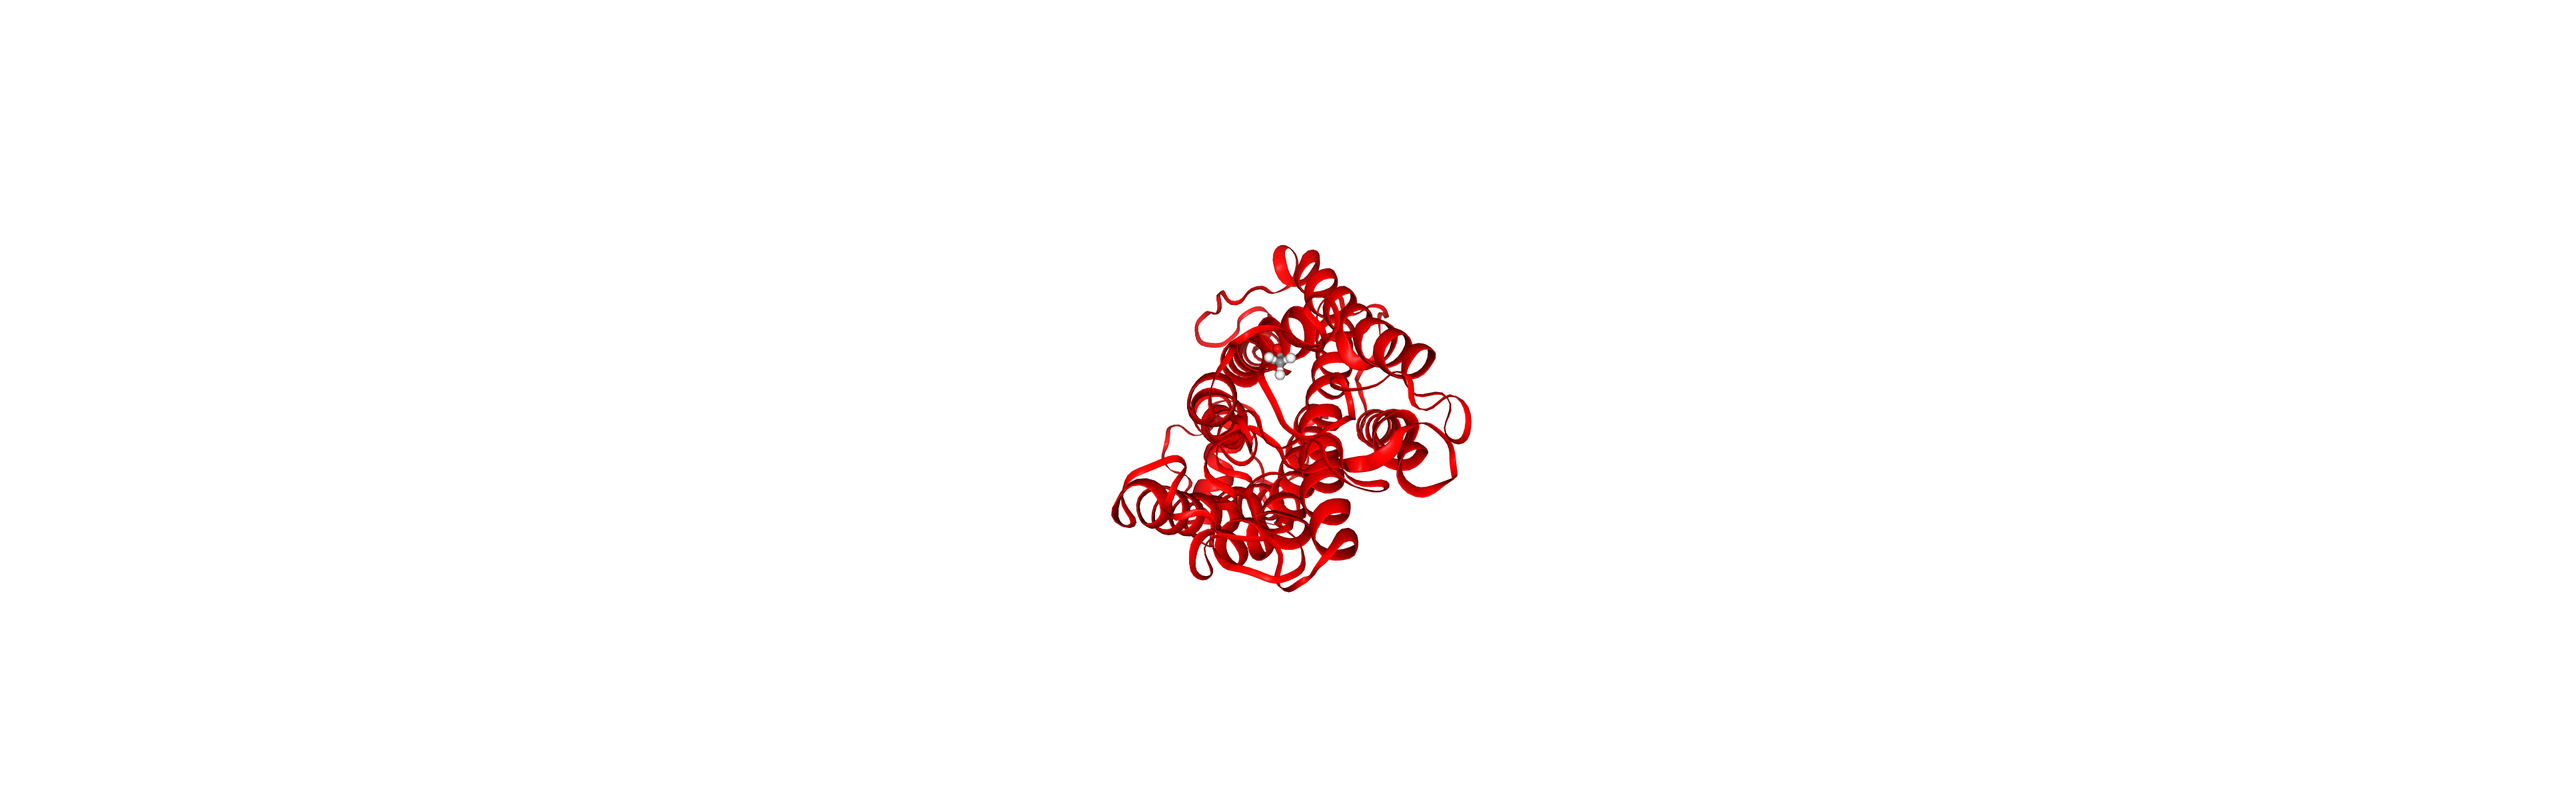

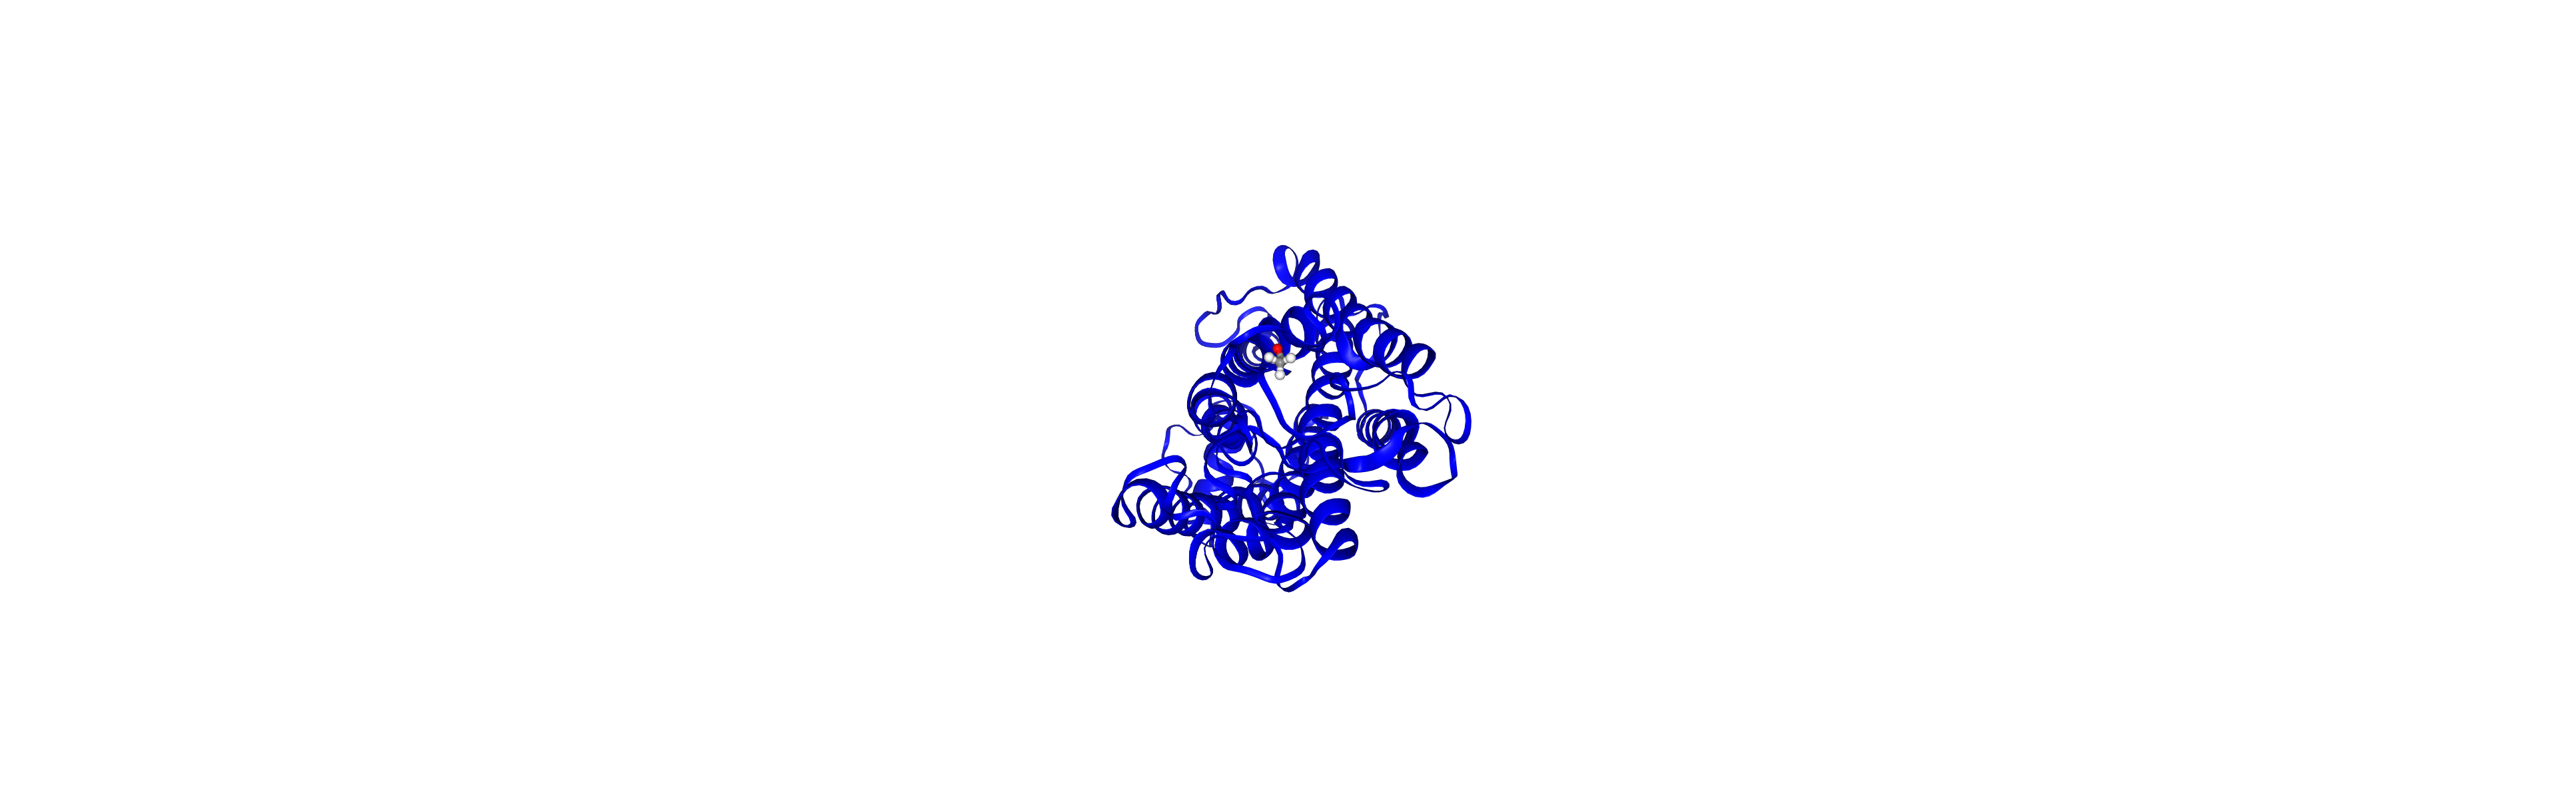

In [56]:
display_many('red_render.png', 'blue_render.png')